# Module

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%autoreload 2
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from src.cv.Model import model_builder_dict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config 

In [33]:
debug = True
debug_data_length = 10
model_builder_key = "cnn_model"

# Data

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
if debug:
    train_images = train_images[:debug_data_length, :, :]
    train_labels = train_labels[:debug_data_length, :]
    test_images = test_images[:debug_data_length, :, :]
    test_labels = test_labels[:debug_data_length, :]

In [35]:
train_images.shape

(10, 32, 32, 3)

In [36]:
train_images[:debug_data_length, :, :].shape

(10, 32, 32, 3)

In [37]:
train_labels.shape

(10, 1)

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


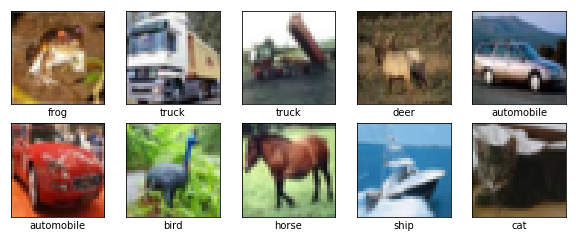

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(debug_data_length):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Train

In [ ]:
model = model_builder_dict[model_builder_key]().build_model()

Let's display the architecture of our model so far.

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65600     
__________

In [43]:

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 10 samples, validate on 10 samples
Epoch 1/10
10/10 [==============================] - 0s 2ms/sample - loss: 1.4646 - acc: 0.5000 - val_loss: 2.8713 - val_acc: 0.1000
Epoch 2/10
10/10 [==============================] - 0s 3ms/sample - loss: 1.3504 - acc: 0.6000 - val_loss: 3.1594 - val_acc: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 2ms/sample - loss: 1.2062 - acc: 0.7000 - val_loss: 3.5527 - val_acc: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 3ms/sample - loss: 1.0928 - acc: 0.7000 - val_loss: 3.7672 - val_acc: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.9522 - acc: 0.8000 - val_loss: 3.7800 - val_acc: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.8146 - acc: 0.8000 - val_loss: 3.9417 - val_acc: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 2ms/sample - loss: 0.6985 - acc: 0.8000 - val_loss: 4.4701 - val_acc: 0.1000
Epoch 8/10
1

In [45]:
history.history

{'acc': [0.5, 0.6, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0],
 'loss': [1.464568018913269,
  1.3504050970077515,
  1.2061904668807983,
  1.0928276777267456,
  0.9522259831428528,
  0.8145931959152222,
  0.6984988451004028,
  0.5699166059494019,
  0.45573148131370544,
  0.3481157720088959],
 'val_acc': [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1],
 'val_loss': [2.871325969696045,
  3.1593704223632812,
  3.552694320678711,
  3.7672455310821533,
  3.7800068855285645,
  3.9416937828063965,
  4.470128536224365,
  4.835857391357422,
  4.809179782867432,
  4.845408916473389]}

# Eval

 - 0s - loss: 4.8454 - acc: 0.1000


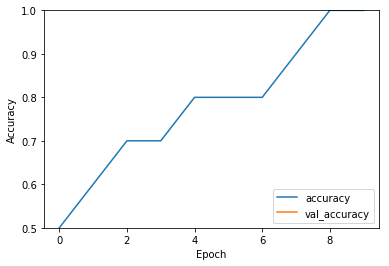

In [48]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [49]:
print(test_acc)

0.1
